In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t=np.array([[None,None,None,None,None, None, None]], dtype=np.float)
data=pd.DataFrame()
for distance in range(3,8,1): 
    for velocity in range(10,11,2):
        for angle in range(240,301,1):
            df=pd.read_csv('turbine_%sp00_%sp00_report_%sD.csv' %(angle, velocity, distance) , sep=' ', header=None)
            df=df.tail(1)
            df=pd.melt(df)
            df=df.dropna()
            a=df.to_numpy(dtype=np.float)
            a=a[:,1]
            x=(np.cos(np.radians(angle-270)))*distance*93
            y=(np.sin(np.radians(angle-270)))*distance*93
            pri=np.array([[distance, velocity, angle,a[22],a[19], x, y]])
            t=np.concatenate((t,pri), axis=0)
            t=np.delete(t,0,0)
            data=data.append(pd.DataFrame(t))
data=data.rename(columns={0: "spacing", 1: "speed", 2: "direction", 3: "t1", 4: "t2", 5: "x", 6:"y"})
#data.to_excel("output.xlsx")
data


/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/953288101.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t=np.array([[None,None,None,None,None, None, None]], dtype=np.float)
/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/953288101.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=

,spacing,speed,direction,t1,t2,x,y
0,3.0,10.0,240.0,7.479762,7.576231,241.621088,-139.500000
0,3.0,10.0,241.0,7.473602,7.567527,244.018898,-135.261884
0,3.0,10.0,242.0,7.467848,7.557923,246.342378,-130.982566
0,3.0,10.0,243.0,7.491735,7.517615,248.590820,-126.663349
0,3.0,10.0,244.0,7.483392,7.500354,250.763539,-122.305550
...,...,...,...,...,...,...,...
0,7.0,10.0,296.0,7.524321,7.523988,585.114924,285.379617
0,7.0,10.0,297.0,7.533778,7.535361,580.045247,295.547815
0,7.0,10.0,298.0,7.523042,7.562130,574.798883,305.625987
0,7.0,10.0,299.0,7.530029,7.558119,569.377429,315.611063


In [2]:
a=data[:61]
at=a['t2']
b=data[61:122]
bt=b['t2']
c=data[122:183]
ct=c['t2']
d=data[183:244]
dt=d['t2']
e=data[244:305]
et=e['t2']

In [3]:
a=data[:61]
at1=a['t1']
at1=at1.to_numpy()[30:61]
at1min=min(at1)
at1max=max(at1)
b=data[61:122]
bt1=b['t1']
bt1=bt1.to_numpy()[30:61]
bt1min=min(bt1)
bt1max=max(bt1)
c=data[122:183]
ct1=c['t1']
ct1=ct1.to_numpy()[30:61]
ct1min=min(ct1)
ct1max=max(ct1)
d=data[183:244]
dt1=d['t1']
dt1=dt1.to_numpy()[30:61]
dt1min=min(dt1)
dt1max=max(dt1)
e=data[244:305]
et1=e['t1']
et1=et1.to_numpy()[30:61]
et1min=min(et1)
et1max=max(et1)

In [4]:
at1av=(min(at1)+max(at1))/2
bt1av=(min(bt1)+max(bt1))/2
ct1av=(min(ct1)+max(ct1))/2
dt1av=(min(dt1)+max(dt1))/2
et1av=(min(et1)+max(et1))/2

In [5]:
print(min(bt1), max(bt1), bt1av)
print(min(ct1), max(ct1), ct1av)
print(min(dt1), max(dt1), dt1av)
print(min(et1), max(et1), et1av)

7.36329556 7.50099802 7.43214679
7.38115644 7.52085543 7.4510059349999995
7.39077377 7.52702665 7.4589002099999995
7.39504862 7.53377819 7.464413405


In [6]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_3D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= at1min:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((at1min-a[19])/(at1min-at1[ind-271]))
print(ang-270)

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/4265841927.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 21 for 10 m/s.
20.796676675242622


In [7]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_4D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= bt1min:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((bt1min-a[19])/(bt1min-bt1[ind-271]))
print(ang-270)
#print(bt1)
#min(at1.to_numpy()[30:61])
#bt1min

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/2438212277.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 17 for 10 m/s.
16.745546533881907


In [8]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_5D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= ct1min:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((ct1min-a[19])/(ct1min-ct1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/2380331550.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 15 for 10 m/s.


14.6106511567329

In [9]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_6D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= dt1min:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((dt1min-a[19])/(dt1min-dt1[ind-271]))
ang-270

Angle of Independence is 13 for 10 m/s.


/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/956748129.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


12.777862220827274

In [10]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_7D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= et1min:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((et1min-a[19])/(et1min-et1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/89781280.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 12 for 10 m/s.


11.683651997080915

In [11]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_3D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= at1max:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((at1max-a[19])/(at1max-at1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/4092957689.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 25 for 10 m/s.


25.259006558030194

In [12]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_4D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= bt1max:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((bt1max-a[19])/(bt1max-bt1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/4175778625.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 21 for 10 m/s.


21.118833433429188

In [13]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_5D.csv'  %(angle, velocity), sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= ct1max:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((ct1max-a[19])/(ct1max-ct1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/154332532.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 22 for 10 m/s.


22.281309479110007

In [14]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_6D.csv'  %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= dt1max:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((dt1max-a[19])/(dt1max-dt1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/2549879871.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 21 for 10 m/s.


21.059559271131093

In [15]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_7D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= et1max:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((et1max-a[19])/(et1max-et1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/2377487871.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 24 for 10 m/s.


24.102426776843004

In [16]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_3D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= at1av:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((at1av-a[19])/(at1av-at1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/1276523189.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 23 for 10 m/s.


22.194629631497378

In [17]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_4D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= bt1av:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((bt1av-a[19])/(bt1av-bt1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/481638677.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 19 for 10 m/s.


17.626755270542787

In [18]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_5D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= ct1av:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((ct1av-a[19])/(ct1av-ct1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/3583830123.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 16 for 10 m/s.


15.315420915553375

In [19]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_6D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= dt1av:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((dt1av-a[19])/(dt1av-dt1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/488848380.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 15 for 10 m/s.


14.814114732329813

In [20]:
for angle in range(270,301,1):
    df=pd.read_csv('turbine_%sp00_%sp00_report_7D.csv' %(angle, velocity) , sep=' ', header=None)
    df=df.tail(1)
    df=pd.melt(df)
    df=df.dropna()
    a=df.to_numpy(dtype=np.float)
    a=a[:,1]
    #print(a[19],a[22])
    if a[19] >= et1av:
        print('Angle of Independence is %s for %s m/s.' %((angle-270), velocity))
        ind=angle
        break
ang=ind-((et1av-a[19])/(et1av-et1[ind-271]))
ang-270

/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/1633585738.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a=df.to_numpy(dtype=np.float)


Angle of Independence is 14 for 10 m/s.


14.547117332338644

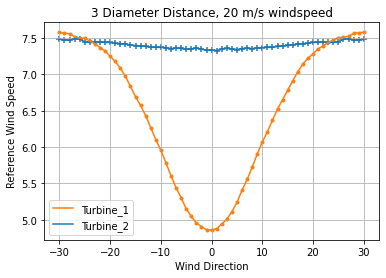

In [21]:
a=data[:61]
t1=a['t1']
t2=a['t2']
fig, ax = plt.subplots()
ax.scatter(a['direction']-270,t1, marker='+')
ax.scatter(a['direction']-270,t2, marker='.')
turb1,=plt.plot(a['direction']-270,t1)
turb2,=plt.plot(a['direction']-270,t2)
plt.ylabel('Reference Wind Speed')
plt.xlabel('Wind Direction')
plt.title('3 Diameter Distance, 20 m/s windspeed')
plt.legend((turb2,turb1),('Turbine_1','Turbine_2'))
#def clear_line(turb1):
#lines.pop(turb1).remove()
    
plt.grid()
#plt.plot(diff[0,:],diff[1,:])
plt.show()
#plt.clr()

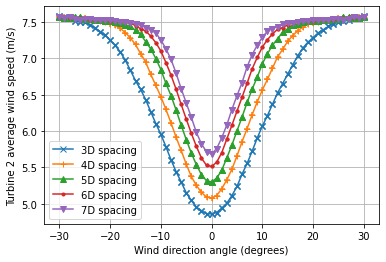

In [22]:
fig, ax = plt.subplots()
ax.scatter((a['direction']-270),at, marker='x')
ax.scatter((b['direction']-270),bt, marker='+')
ax.scatter((c['direction']-270),ct, marker='^')
ax.scatter((d['direction']-270),dt, marker='.')
ax.scatter((e['direction']-270),et, marker='v')
turb1,=plt.plot((a['direction']-270),at, marker='x')
turb2,=plt.plot((b['direction']-270),bt, marker='+')
turb3,=plt.plot((c['direction']-270),ct, marker='^')
turb4,=plt.plot((d['direction']-270),dt, marker='.')
turb5,=plt.plot((e['direction']-270),et, marker='v')
plt.ylabel('Turbine 2 average wind speed (m/s)')
plt.xlabel('Wind direction angle (degrees)')
#plt.title('20 m/s windspeed Turbine_2')
plt.legend((turb1,turb2,turb3,turb4,turb5),('3D spacing','4D spacing','5D spacing','6D spacing','7D spacing'))
    
plt.grid()

plt.show()


/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/1688390324.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  difa=np.array([None], dtype=np.float)
/var/folders/gr/z6l2h7kd4136nf0xqdtls40w0000gn/T/ipykernel_958/1688390324.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  difb=np.array([None], dtype=np.float)
/var/folders

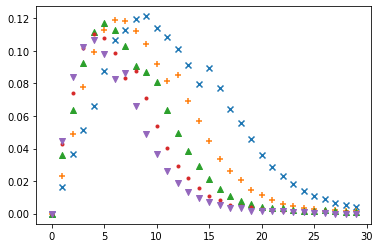

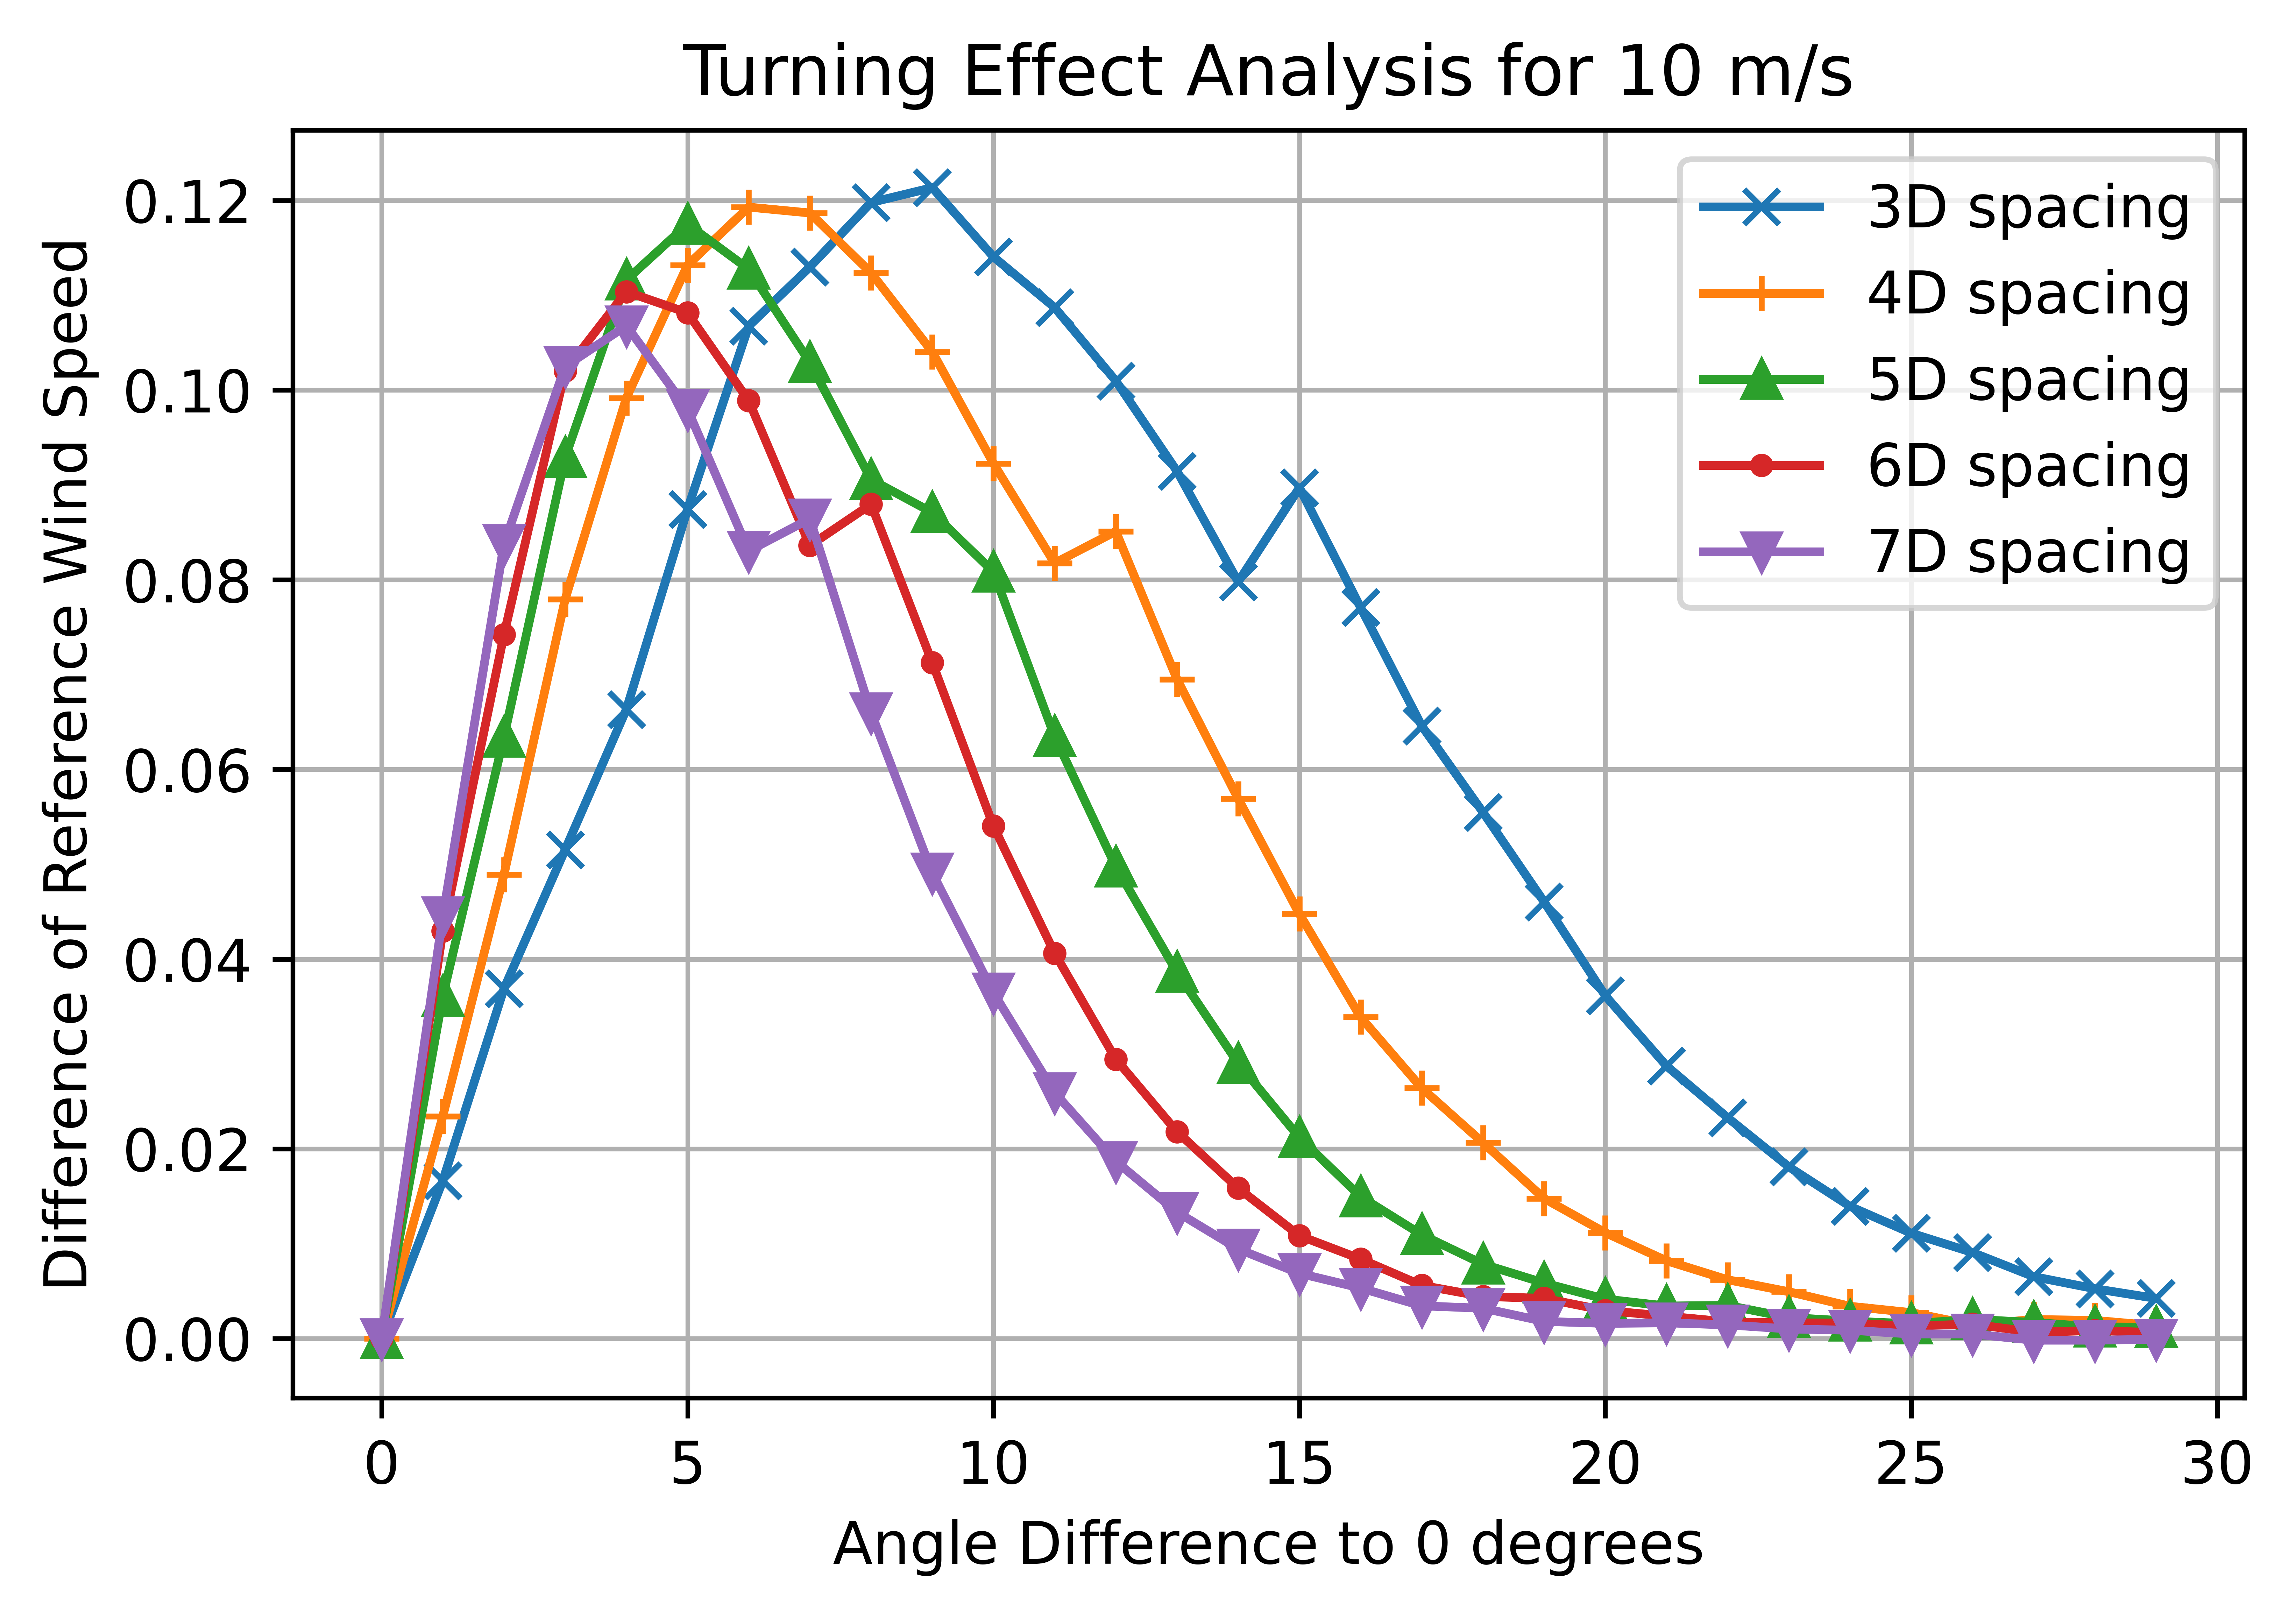

In [28]:
difa=np.array([None], dtype=np.float)
difb=np.array([None], dtype=np.float)
difc=np.array([None], dtype=np.float)
difd=np.array([None], dtype=np.float)
dife=np.array([None], dtype=np.float)
for i in range (30,0,-1):
    ga=np.array([at.to_numpy(dtype=np.float)[60-i]-at.to_numpy(dtype=np.float)[i]])
    gb=np.array([bt.to_numpy(dtype=np.float)[60-i]-bt.to_numpy(dtype=np.float)[i]])
    gc=np.array([ct.to_numpy(dtype=np.float)[60-i]-ct.to_numpy(dtype=np.float)[i]])
    gd=np.array([dt.to_numpy(dtype=np.float)[60-i]-dt.to_numpy(dtype=np.float)[i]])
    ge=np.array([et.to_numpy(dtype=np.float)[60-i]-et.to_numpy(dtype=np.float)[i]])
    difa=np.concatenate((difa,ga),axis=0)
    difb=np.concatenate((difb,gb),axis=0)
    difc=np.concatenate((difc,gc),axis=0)
    difd=np.concatenate((difd,gd),axis=0)
    dife=np.concatenate((dife,ge),axis=0)
difa=np.delete(difa,0,0)
difb=np.delete(difb,0,0)
difc=np.delete(difc,0,0)
difd=np.delete(difd,0,0)
dife=np.delete(dife,0,0)
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
#x=[29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
fig, ax = plt.subplots()
plt.figure(dpi=1200)
ax.scatter(x,difa, marker='x')
ax.scatter(x,difb, marker='+')
ax.scatter(x,difc, marker='^')
ax.scatter(x,difd, marker='.')
ax.scatter(x,dife, marker='v')
turb1,=plt.plot(difa, marker='x')
turb2,=plt.plot(difb, marker='+')
turb3,=plt.plot(difc, marker='^')
turb4,=plt.plot(difd, marker='.')
turb5,=plt.plot(dife, marker='v')
plt.ylabel('Difference of Reference Wind Speed')
plt.xlabel('Angle Difference to 0 degrees')
plt.title('Turning Effect Analysis for 10 m/s')
plt.legend((turb1,turb2,turb3,turb4,turb5),('3D spacing','4D spacing','5D spacing','6D spacing','7D spacing'),loc='upper right')

plt.grid()
plt.show()

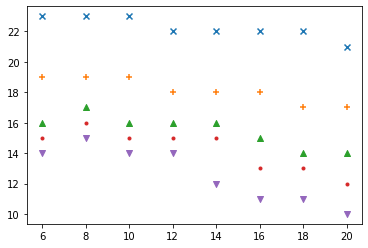

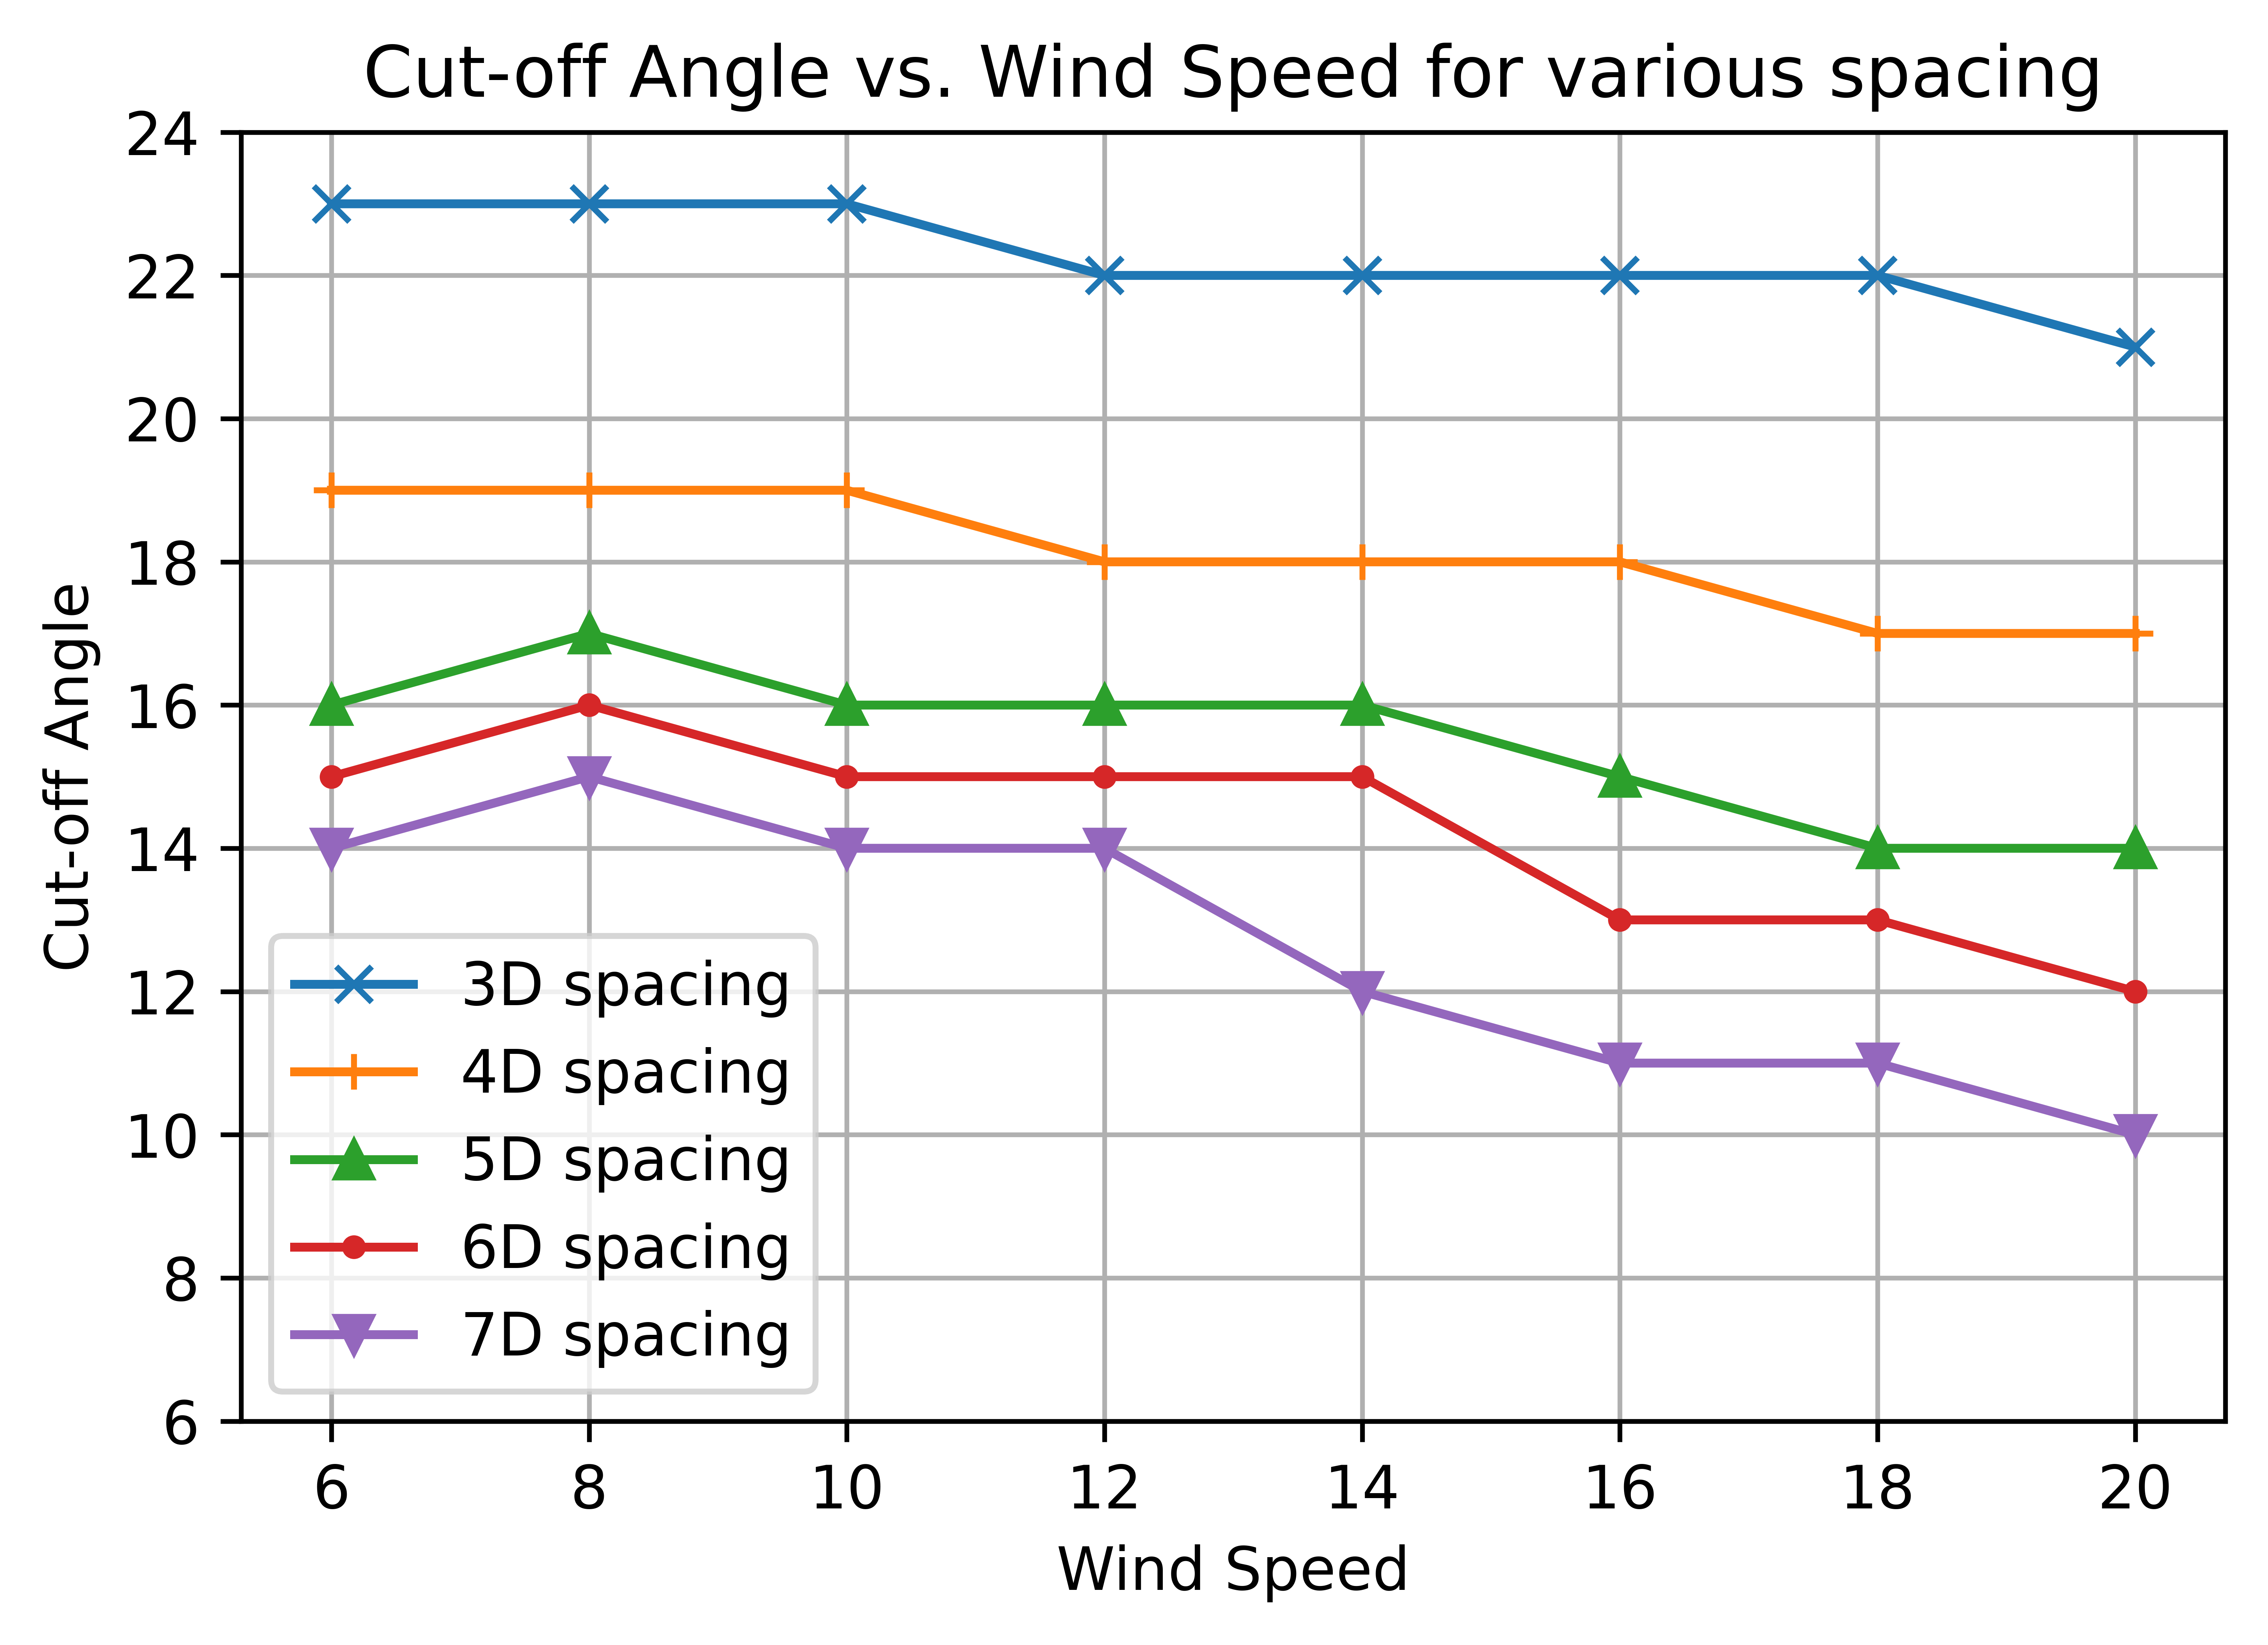

In [29]:
import matplotlib.pyplot as plt
d3=[23,23,23,22,22,22,22,21]
d4=[19,19,19,18,18,18,17,17]
d5=[16,17,16,16,16,15,14,14]
d6=[15,16,15,15,15,13,13,12]
d7=[14,15,14,14,12,11,11,10]
speed=[6,8,10,12,14,16,18,20]
fig, ax = plt.subplots()
plt.figure(dpi=1200)
ax.scatter(speed,d3, marker='x')
ax.scatter(speed,d4, marker='+')
ax.scatter(speed,d5, marker='^')
ax.scatter(speed,d6, marker='.')
ax.scatter(speed,d7, marker='v')
turb1,=plt.plot(speed,d3, marker='x')
turb2,=plt.plot(speed,d4, marker='+')
turb3,=plt.plot(speed,d5, marker='^')
turb4,=plt.plot(speed,d6, marker='.')
turb5,=plt.plot(speed,d7, marker='v')
plt.ylim(6, 24)
plt.ylabel('Cut-off Angle')
plt.xlabel('Wind Speed')
plt.title('Cut-off Angle vs. Wind Speed for various spacing')
plt.legend((turb1,turb2,turb3,turb4,turb5),('3D spacing','4D spacing','5D spacing','6D spacing','7D spacing'),loc='lower left')

plt.grid()
plt.show()

In [39]:
dif=np.array([None], dtype=np.float)
for i in range (0,30,1):
    ga=np.array([at.to_numpy(dtype=np.float)[i]-at.to_numpy(dtype=np.float)[60-i]])
    gb=np.array([bt.to_numpy(dtype=np.float)[i]-bt.to_numpy(dtype=np.float)[60-i]])
    gc=np.array([ct.to_numpy(dtype=np.float)[i]-ct.to_numpy(dtype=np.float)[60-i]])
    gd=np.array([dt.to_numpy(dtype=np.float)[i]-dt.to_numpy(dtype=np.float)[60-i]])
    ge=np.array([et.to_numpy(dtype=np.float)[i]-et.to_numpy(dtype=np.float)[60-i]])
    difa=np.concatenate((difa,ga),axis=0)
    difb=np.concatenate((dif,gb),axis=0)
    difc=np.concatenate((dif,gc),axis=0)
    difd=np.concatenate((dif,gd),axis=0)
    dife=np.concatenate((dif,ge),axis=0)

Text(0.5, 0, 'Spacing Difference')

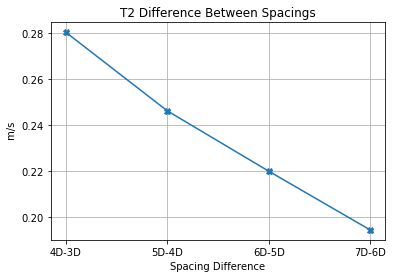

In [13]:
import matplotlib.pyplot as plt
k=[0.2803, 0.2462, 0.22, 0.1945]
l=['4D-3D','5D-4D','6D-5D','7D-6D']
plt.grid()

plt.plot(l,k, marker='X')
plt.title('T2 Difference Between Spacings')
plt.ylabel(' m/s')
plt.xlabel('Spacing Difference')

Text(0.5, 0, 'Spacing')

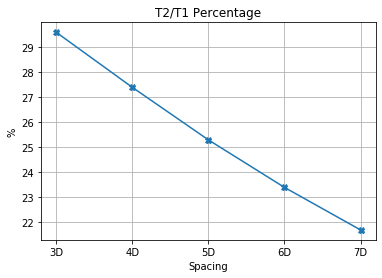

In [11]:
import matplotlib.pyplot as plt
k=[29.6, 27.4, 25.3, 23.4, 21.7]
l=['3D','4D','5D','6D','7D']
plt.grid()

plt.plot(l,k, marker='X')
plt.title('T2/T1 Percentage')
plt.ylabel('%')
plt.xlabel('Spacing')